In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import array, ndarray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show


In [2]:
import pandas as pd
traf_df = pd.read_csv("data/traffic_accidents.csv")
traf_df.head()


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
traf_target = traf_df["crash_type"] #pulling target out before dropping non-numerics

traf_features = traf_df.drop(columns=["crash_type"])

traf_features = traf_features.dropna(axis=1, how="all") # dropping empty variables col-wise
traf_features = traf_features.dropna(axis=0, how="any") #dropping rows with any missing values

traf_target = traf_target.loc[traf_features.index] #target and remaining rows aligned

traf_features = traf_features.select_dtypes(include=["number"]) #keeping only numeric cols

print(traf_features.info())
print("Features shape:", traf_features.shape)
print("Target shape:", traf_target.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   num_units                      209306 non-null  int64  
 1   injuries_total                 209306 non-null  float64
 2   injuries_fatal                 209306 non-null  float64
 3   injuries_incapacitating        209306 non-null  float64
 4   injuries_non_incapacitating    209306 non-null  float64
 5   injuries_reported_not_evident  209306 non-null  float64
 6   injuries_no_indication         209306 non-null  float64
 7   crash_hour                     209306 non-null  int64  
 8   crash_day_of_week              209306 non-null  int64  
 9   crash_month                    209306 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 16.0 MB
None
Features shape: (209306, 10)
Target shape: (209306,)


In [4]:
# train/test splitting
traf_features_train, traf_features_test, traf_target_train, traf_target_test = train_test_split(
    traf_features,
    traf_target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=traf_target       # keeps class proportions similar in train and test
)

print(traf_features_train.shape, traf_features_test.shape)
print(traf_target_train.shape, traf_target_test.shape)

(146514, 10) (62792, 10)
(146514,) (62792,)


**NAIVE BAYES ANALYSIS**

Accuracy: {'GaussianNB': 0.8212988915785451, 'MultinomialNB': 0.8205981653713849, 'BernoulliNB': 0.8205981653713849}
Recall: {'GaussianNB': 0.8212988915785451, 'MultinomialNB': 0.8205981653713849, 'BernoulliNB': 0.8205981653713849}


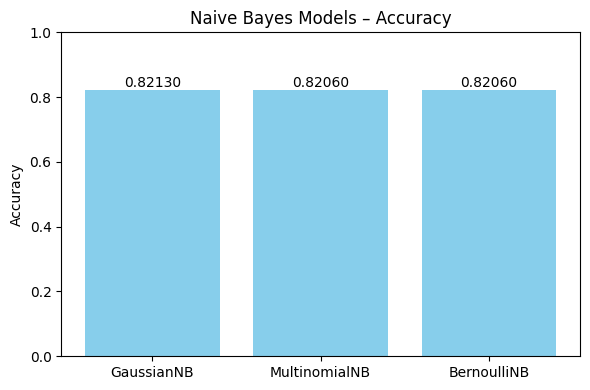

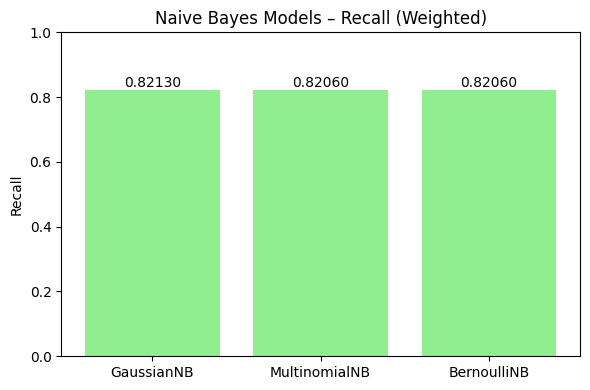

In [5]:
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
}

nb_accuracy = {}
nb_recall = {}

for name, model in models.items():
    model.fit(traf_features_train, traf_target_train)
    preds = model.predict(traf_features_test)
    
    nb_accuracy[name] = accuracy_score(traf_target_test, preds)
    nb_recall[name] = recall_score(traf_target_test, preds, average="weighted", zero_division=0)

print("Accuracy:", nb_accuracy)
print("Recall:", nb_recall)

##### accuracy chart #####
plt.figure(figsize=(6,4))
plt.bar(nb_accuracy.keys(), nb_accuracy.values(), color='skyblue')
plt.title("Naive Bayes Models – Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for i, (name, val) in enumerate(nb_accuracy.items()):
    plt.text(i, val + 0.01, f"{val:.5f}", ha='center')

plt.tight_layout()
plt.show()

##### recall chart #####
plt.figure(figsize=(6,4))
plt.bar(nb_recall.keys(), nb_recall.values(), color='lightgreen')
plt.title("Naive Bayes Models – Recall (Weighted)")
plt.ylabel("Recall")
plt.ylim(0, 1)

for i, (name, val) in enumerate(nb_recall.items()):
    plt.text(i, val + 0.01, f"{val:.5f}", ha='center')

plt.tight_layout()
plt.show()

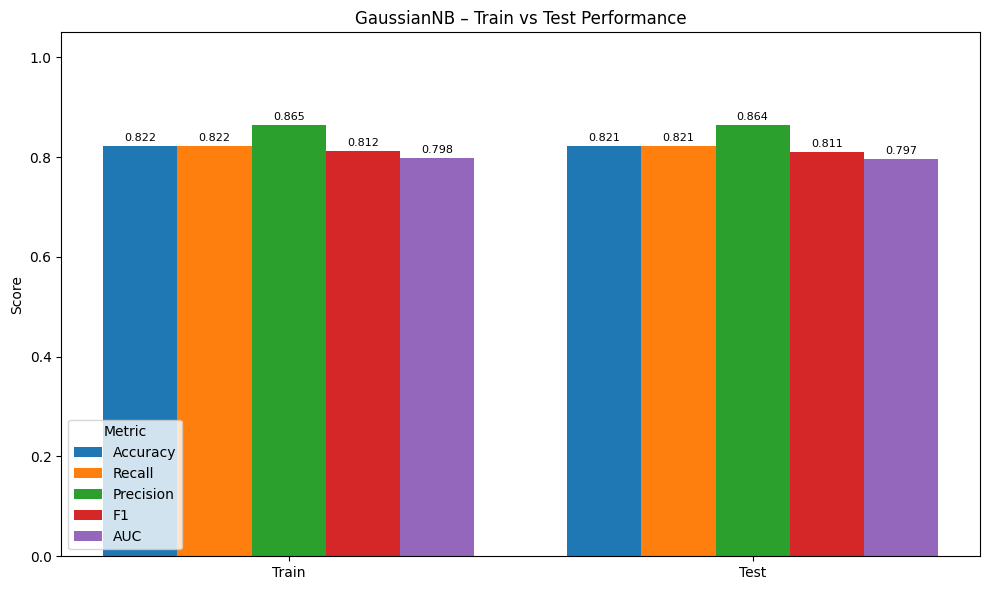

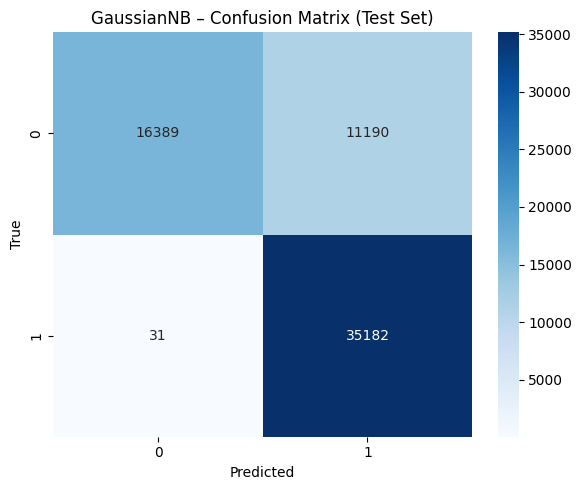

In [6]:
best_nb = GaussianNB()
best_nb.fit(traf_features_train, traf_target_train)

pred_train = best_nb.predict(traf_features_train)
pred_test = best_nb.predict(traf_features_test)

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(traf_target_train).ravel()
y_test_bin = lb.transform(traf_target_test).ravel()
pred_train_bin = lb.transform(pred_train).ravel()
pred_test_bin = lb.transform(pred_test).ravel()

train_metrics = {
    "Accuracy": accuracy_score(traf_target_train, pred_train),
    "Recall": recall_score(traf_target_train, pred_train, average="weighted", zero_division=0),
    "Precision": precision_score(traf_target_train, pred_train, average="weighted", zero_division=0),
    "F1": f1_score(traf_target_train, pred_train, average="weighted", zero_division=0),
    "AUC": roc_auc_score(y_train_bin, pred_train_bin),
}

test_metrics = {
    "Accuracy": accuracy_score(traf_target_test, pred_test),
    "Recall": recall_score(traf_target_test, pred_test, average="weighted", zero_division=0),
    "Precision": precision_score(traf_target_test, pred_test, average="weighted", zero_division=0),
    "F1": f1_score(traf_target_test, pred_test, average="weighted", zero_division=0),
    "AUC": roc_auc_score(y_test_bin, pred_test_bin),
}

train_metrics, test_metrics

metrics = list(train_metrics.keys())
train_vals = [train_metrics[m] for m in metrics]
test_vals  = [test_metrics[m] for m in metrics]

groups = np.array([0, 1])  # 0 = Train, 1 = Test
group_labels = ["Train", "Test"]

n_metrics = len(metrics)
group_width = 0.8
bar_width = group_width / n_metrics

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"][:n_metrics]

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    positions = groups - group_width/2 + (i + 0.5) * bar_width
    plt.bar(positions,
            [train_vals[i], test_vals[i]],
            width=bar_width,
            label=metric,
            color=colors[i])
    for x, val in zip(positions, [train_vals[i], test_vals[i]]):
        plt.text(x, val + 0.01, f"{val:.3f}", ha="center", fontsize=8)

plt.xticks(groups, group_labels)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("GaussianNB – Train vs Test Performance")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

cm = confusion_matrix(traf_target_test, pred_test)
labels = traf_target_test.unique()

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            )
plt.title("GaussianNB – Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


**LOGISTIC REGRESSION ANALYSIS**

c:\Users\aamgr\Documents\Kodeprosjekter\ds-project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\aamgr\Documents\Kodeprosjekter\ds-project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\aamgr\Documents\Kodeprosjekter\ds-project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\aamgr\Documents\Kodeprosjekter\ds-project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\aamgr\Documents\Kodeprosjekter\ds-project\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

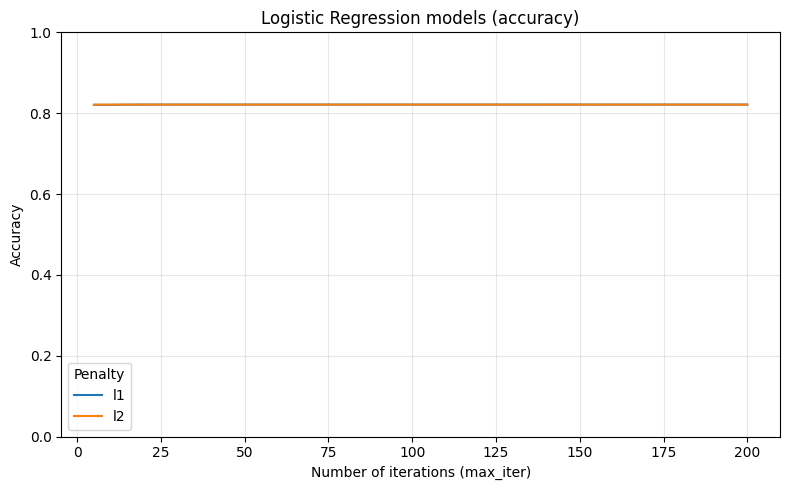


===== Final metrics per penalty (best model for each) =====

Penalty = L1 (best max_iter=45)
Accuracy: 0.8212
Recall: 0.8212
Precision: 0.8636
F1: 0.8108

Penalty = L2 (best max_iter=10)
Accuracy: 0.8212
Recall: 0.8212
Precision: 0.8636
F1: 0.8108


In [7]:
def logistic_regression_study(trnX, trnY, tstX, tstY, nr_max_iterations=500, lag=10):
    nr_iterations = list(range(lag, nr_max_iterations + 1, lag))
    penalty_types = ["l1", "l2"]

    values = {}          # accuracy curves for plotting
    best_models = {}     # best model per penalty
    best_iters = {}      # best max_iter per penalty
    best_accs = {}       # best accuracy per penalty

    for penalty in penalty_types:
        acc_values = []
        best_acc = -1.0
        best_model = None
        best_iter = None

        for n_iter in nr_iterations:
            clf = LogisticRegression(
                penalty=penalty,
                max_iter=n_iter,
                solver="liblinear",
                verbose=False,
            )
            clf.fit(trnX, trnY)
            preds = clf.predict(tstX)
            acc = accuracy_score(tstY, preds)
            acc_values.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_model = clf
                best_iter = n_iter

        values[penalty] = acc_values
        best_models[penalty] = best_model
        best_iters[penalty] = best_iter
        best_accs[penalty] = best_acc

    # plot accuracy vs iterations
    plt.figure(figsize=(8, 5))
    for penalty in penalty_types:
        plt.plot(nr_iterations, values[penalty], label=penalty)
    plt.xlabel("Number of iterations (max_iter)")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.title("Logistic Regression models (accuracy)")
    plt.legend(title="Penalty")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # compute final metrics for the best L1 and best L2 models
    final_metrics = {}
    for penalty in penalty_types:
        model = best_models[penalty]
        preds = model.predict(tstX)

        final_metrics[penalty] = {
            "best_max_iter": best_iters[penalty],
            "Accuracy": accuracy_score(tstY, preds),
            "Recall": recall_score(tstY, preds, average="weighted", zero_division=0),
            "Precision": precision_score(tstY, preds, average="weighted", zero_division=0),
            "F1": f1_score(tstY, preds, average="weighted", zero_division=0),
        }

    print("\n===== Final metrics per penalty (best model for each) =====")
    for penalty in penalty_types:
        print(f"\nPenalty = {penalty.upper()} (best max_iter={final_metrics[penalty]['best_max_iter']})")
        for m in ["Accuracy", "Recall", "Precision", "F1"]:
            print(f"{m}: {final_metrics[penalty][m]:.4f}")

    return best_models, final_metrics


lr_best_models, lr_final_metrics = logistic_regression_study(
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test,
    nr_max_iterations=200,
    lag=5
)

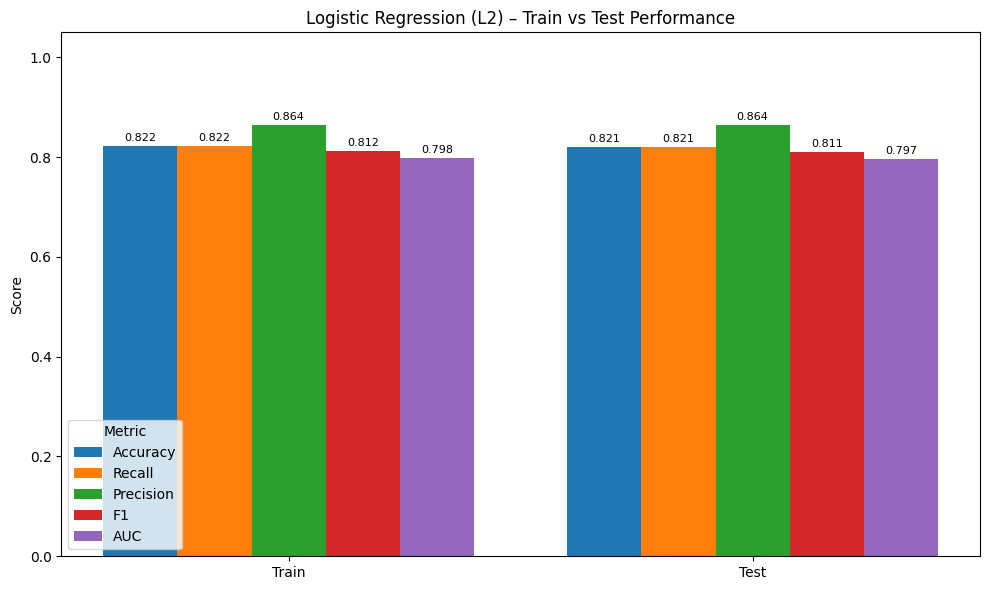

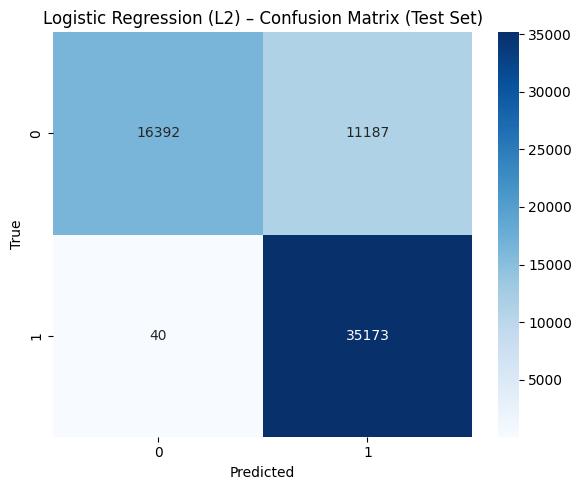

In [8]:
best_lr = lr_best_models["l2"]

pred_train_lr = best_lr.predict(traf_features_train)
pred_test_lr = best_lr.predict(traf_features_test)

lb_lr = LabelBinarizer()
y_train_bin_lr = lb_lr.fit_transform(traf_target_train).ravel()
y_test_bin_lr = lb_lr.transform(traf_target_test).ravel()
pred_train_bin_lr = lb_lr.transform(pred_train_lr).ravel()
pred_test_bin_lr = lb_lr.transform(pred_test_lr).ravel()

lr_train_metrics = {
    "Accuracy": accuracy_score(traf_target_train, pred_train_lr),
    "Recall": recall_score(traf_target_train, pred_train_lr, average="weighted", zero_division=0),
    "Precision": precision_score(traf_target_train, pred_train_lr, average="weighted", zero_division=0),
    "F1": f1_score(traf_target_train, pred_train_lr, average="weighted", zero_division=0),
    "AUC": roc_auc_score(y_train_bin_lr, pred_train_bin_lr),
}

lr_test_metrics = {
    "Accuracy": accuracy_score(traf_target_test, pred_test_lr),
    "Recall": recall_score(traf_target_test, pred_test_lr, average="weighted", zero_division=0),
    "Precision": precision_score(traf_target_test, pred_test_lr, average="weighted", zero_division=0),
    "F1": f1_score(traf_target_test, pred_test_lr, average="weighted", zero_division=0),
    "AUC": roc_auc_score(y_test_bin_lr, pred_test_bin_lr),
}

lr_train_metrics, lr_test_metrics

metrics = list(lr_train_metrics.keys())
train_vals = [lr_train_metrics[m] for m in metrics]
test_vals  = [lr_test_metrics[m] for m in metrics]

groups = np.array([0, 1])  # 0 = Train, 1 = Test
group_labels = ["Train", "Test"]

n_metrics = len(metrics)
group_width = 0.8
bar_width = group_width / n_metrics

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"][:n_metrics]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    positions = groups - group_width/2 + (i + 0.5) * bar_width
    plt.bar(positions,
            [train_vals[i], test_vals[i]],
            width=bar_width,
            label=metric,
            color=colors[i])
    for x, val in zip(positions, [train_vals[i], test_vals[i]]):
        plt.text(x, val + 0.01, f"{val:.3f}", ha="center", fontsize=8)

plt.xticks(groups, group_labels)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Logistic Regression (L2) – Train vs Test Performance")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

cm_lr = confusion_matrix(traf_target_test, pred_test_lr)
labels_lr = traf_target_test.unique()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression (L2) – Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [9]:
#eval helper, maybe delete later

def evaluate_model(model_name, model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)

    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions, average="weighted", zero_division=0)
    recall = recall_score(target_test, predictions, average="weighted", zero_division=0)

    print(f"--- {model_name} ---")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print()
    
    return accuracy, precision, recall

### MLP analysis

In [ ]:
from typing import Literal
from numpy import array, ndarray
from matplotlib.pyplot import subplots, figure, savefig, show
from sklearn.neural_network import MLPClassifier
from dslabs_functions import (
    CLASS_EVAL_METRICS,
    DELTA_IMPROVE,
)
from dslabs_functions import HEIGHT, plot_evaluation_results, plot_multiline_chart

LAG: int = 500
NR_MAX_ITER: int = 5000

def mlp_study(
    trnX: ndarray,
    trnY: array,
    tstX: ndarray,
    tstY: array,
    nr_max_iterations: int = 2500,
    lag: int = 500,
    metric: str = "accuracy",
) -> tuple[MLPClassifier | None, dict]:
    nr_iterations: list[int] = [lag] + [
        i for i in range(2 * lag, nr_max_iterations + 1, lag)
    ]

    lr_types: list[Literal["constant", "invscaling", "adaptive"]] = [
        "constant",
        "invscaling",
        "adaptive",
    ]  # only used if optimizer='sgd'
    learning_rates: list[float] = [0.5, 0.05, 0.005, 0.0005]

    best_model: MLPClassifier | None = None
    best_params: dict = {"name": "MLP", "metric": metric, "params": ()}
    best_performance: float = 0.0

    values: dict = {}
    _, axs = subplots(
        1, len(lr_types), figsize=(len(lr_types) * HEIGHT, HEIGHT), squeeze=False
    )
    for i in range(len(lr_types)):
        type: str = lr_types[i]
        values = {}
        for lr in learning_rates:
            warm_start: bool = False
            y_tst_values: list[float] = []
            for j in range(len(nr_iterations)):
                clf = MLPClassifier(
                    learning_rate=type,
                    learning_rate_init=lr,
                    max_iter=lag,
                    warm_start=warm_start,
                    activation="logistic",
                    solver="sgd",
                    verbose=False,
                )
                clf.fit(trnX, trnY)
                prdY: array = clf.predict(tstX)
                eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
                y_tst_values.append(eval)
                warm_start = True
                if eval - best_performance > DELTA_IMPROVE:
                    best_performance = eval
                    best_params["params"] = (type, lr, nr_iterations[j])
                    best_model = clf
                # print(f'MLP lr_type={type} lr={lr} n={nr_iterations[j]}')
            values[lr] = y_tst_values
        plot_multiline_chart(
            nr_iterations,
            values,
            ax=axs[0, i],
            title=f"MLP with {type}",
            xlabel="nr iterations",
            ylabel=metric,
            percentage=True,
        )
    print(
        f'MLP best for {best_params["params"][2]} iterations (lr_type={best_params["params"][0]} and lr={best_params["params"][1]}'
    )

    return best_model, best_params

eval_metric = "accuracy"
figure()
best_model, params = mlp_study(
    traf_features_train,
    traf_target_train,
    traf_features_test,
    traf_target_test,
    nr_max_iterations=NR_MAX_ITER,
    lag=LAG,
    metric=eval_metric,
)
savefig(f"images/{file_tag}_mlp_{eval_metric}_study.png")
show()

In [ ]:
flight_df = pd.read_csv("Combined_Flights_2022.csv")
flight_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Combined_Flights_2022.csv'

In [ ]:
flight_target = flight_df["Cancelled"]
flight_features = flight_df.drop(columns=["Cancelled"])

flight_features = flight_features.dropna(axis=1, how="all") #drops all cols with all NaN

flight_features = flight_features.dropna(axis=1, how="any") #drops all cols with any NaN

flight_target = flight_target.loc[flight_features.index]

flight_features = flight_features.select_dtypes(include=["number"])

print("Final target distribution:")
print(flight_target.value_counts(dropna=False))

Final target distribution:
Cancelled
False    3955126
True      123192
Name: count, dtype: int64


In [ ]:
sample_size = 200000  # smaller because data set is huge, models take too long

flight_features_sampled = flight_features.sample(n=sample_size, random_state=42)
flight_target_sampled = flight_target.loc[flight_features_sampled.index]

print("\nSampled features shape:", flight_features_sampled.shape)
print("Sampled target distribution:")
print(flight_target_sampled.value_counts(dropna=False))

flight_features_train, flight_features_test, flight_target_train, flight_target_test = train_test_split(
    flight_features_sampled,
    flight_target_sampled,
    test_size=0.3,
    random_state=42,
    stratify=flight_target_sampled
)


Sampled features shape: (200000, 25)
Sampled target distribution:
Cancelled
False    194064
True       5936
Name: count, dtype: int64
